# Visualize Drug Similarity Part 2

In [1]:
from util import *

## Zooming into MEK and RAF

In [3]:
df, df_info = get_processed_data(drugs_as_features=False, impute=True)
df_moa = df.join(df_info[["broad_id", "name", "dose", "moa"]], how="left")
df_moa.moa.fillna("Unknown", inplace=True)

In [4]:
some_cancer_moas = {"EGFR inhibitor", "PI3K inhibitor", "MEK inhibitor", "MAP kinase inhibitor", "RAF inhibitor", "PARP inhibitor", "CDK inhibitor"}
df_moa.moa = df_moa.moa.apply(lambda moa: moa if moa in some_cancer_moas else "Other")

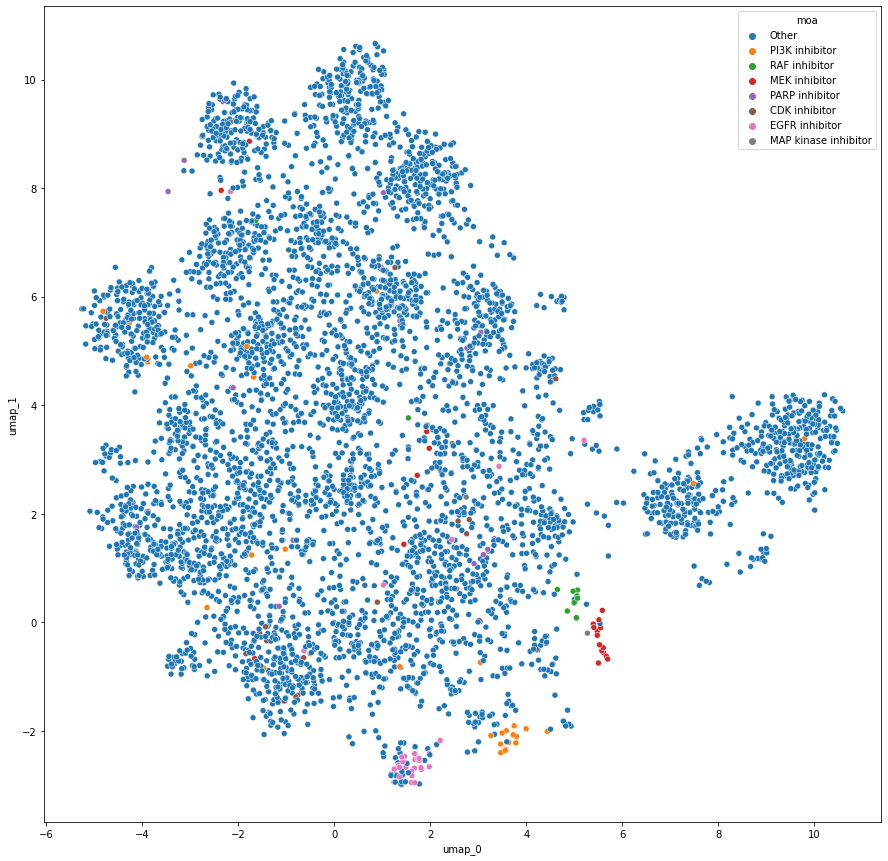

In [5]:
df_umap = run_umap(df_moa, extra_cols=["broad_id", "name", "dose", "moa"])
draw_umap(df_umap, hue="moa")

In [6]:
df_moa = df.join(df_info[["broad_id", "name", "dose", "moa"]], how="left")
df_moa.moa.fillna("Unknown", inplace=True)

In [7]:
df_umap = run_umap(df_moa, extra_cols=["broad_id", "name", "dose", "moa"])

In [8]:
mask = ((df_umap.umap_0 >= 5) & (df_umap.umap_0 <= 6) &
        (df_umap.umap_1 <= 0.5) & (df_umap.umap_1 >= -1))
df_umap_within_bounds = df_umap[mask]
df_umap_outside_bounds = df_umap[~mask]

In [9]:
df_umap_within_bounds

,umap_0,umap_1,broad_id,name,dose,moa
506,5.475603,-0.161494,BRD-A57798112-001-03-7,PD-318088,2.50,MEK inhibitor
923,5.607533,-0.555142,BRD-K03390685-001-01-7,cobimetinib,2.50,MEK inhibitor
958,5.395088,-0.031036,BRD-K05104363-001-10-0,PD-184352,2.50,MEK inhibitor
978,5.049303,0.072179,BRD-K05804044-001-06-0,AZ-628,2.50,RAF inhibitor
1200,5.501709,-0.748714,BRD-K12343256-001-08-9,trametinib,2.50,MEK inhibitor
1344,5.054216,0.487183,BRD-K16478699-001-09-2,PLX-4720,2.50,RAF inhibitor
1420,5.582629,0.221670,BRD-K18787491-001-08-6,U-0126,2.50,MEK inhibitor
1684,5.667303,-0.625857,BRD-K26667523-001-02-5,TAK-733,2.50,MEK inhibitor
1769,5.272820,-0.197851,BRD-K28965160-001-01-1,BVD-523,2.50,MAP kinase inhibitor
1857,5.041578,0.086233,BRD-K31866293-001-01-6,TAK-632,2.50,RAF inhibitor


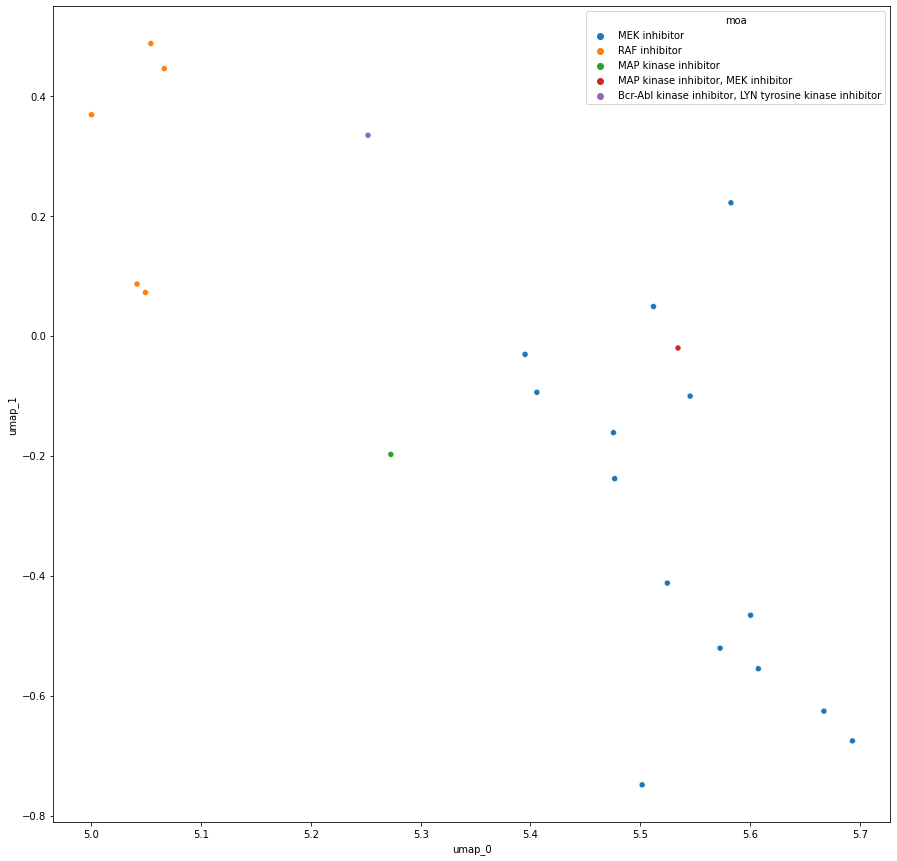

In [10]:
draw_umap(df_umap_within_bounds, hue="moa")

In [11]:
df_umap_outside_bounds[df_umap_outside_bounds.moa == "MEK inhibitor"]

,umap_0,umap_1,broad_id,name,dose,moa
1006,-1.655783,-0.667790,BRD-K06753942-001-14-5,nobiletin,2.50,MEK inhibitor
1197,-1.766107,8.863086,BRD-K12244279-001-05-8,MEK1-2-inhibitor,2.50,MEK inhibitor
1478,1.979363,3.207954,BRD-K20290250-001-01-3,BIX-02188,2.50,MEK inhibitor
1479,1.926376,3.515502,BRD-K20290250-001-02-1,BIX-02188,2.38,MEK inhibitor
2587,4.466172,1.754808,BRD-K53523901-001-04-4,arctigenin,2.50,MEK inhibitor
2912,1.450324,1.438640,BRD-K62810658-001-12-2,PD-98059,2.50,MEK inhibitor
2926,-2.351981,7.958720,BRD-K63169195-001-01-5,U-0124,2.50,MEK inhibitor
3260,1.729458,2.709318,BRD-K73368362-001-07-5,BIX-02189,2.50,MEK inhibitor
